# Importing libraries:

Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reading data:

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df.apply(lambda x: sum(x.isnull()))

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Visualizing Data:

* ## Correlation matrix for Input variables:

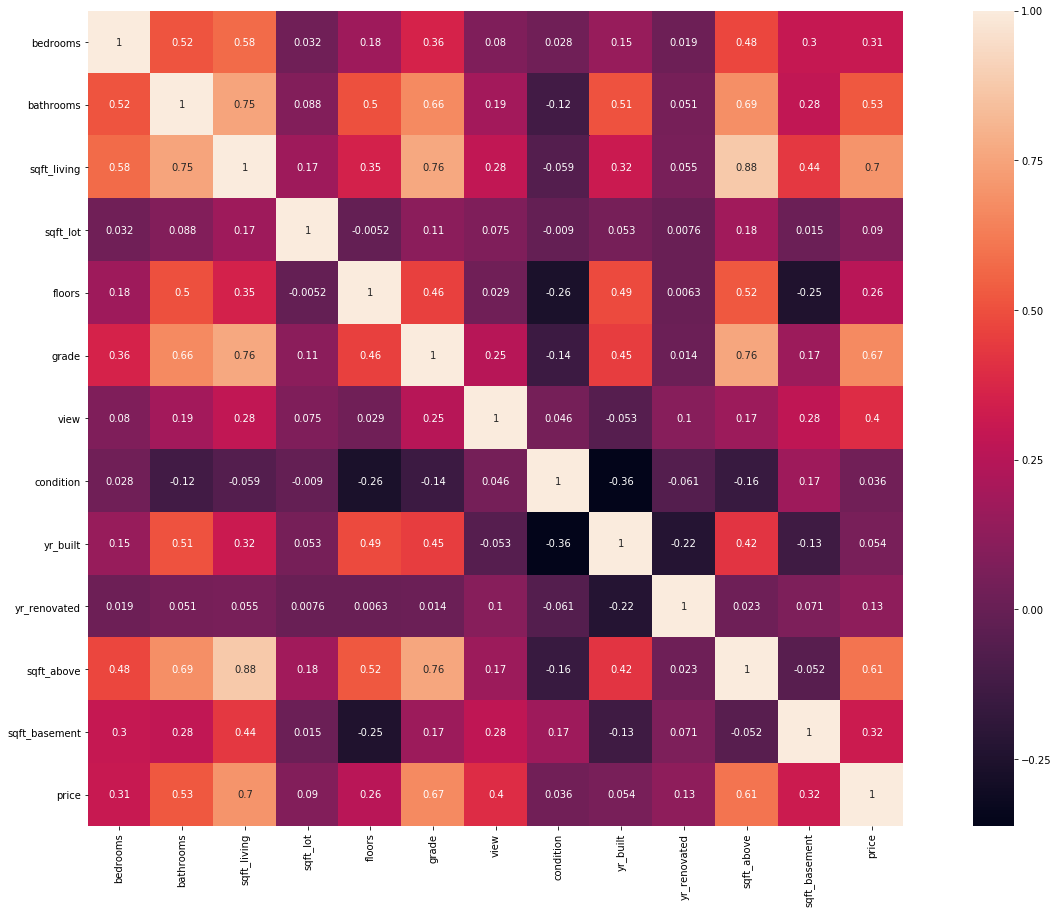

In [9]:
corrmat = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","grade","view","condition","yr_built","yr_renovated","sqft_above","sqft_basement","price"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True)

* ## Histogram plots for all input variables:

Text(0,0.5,'Frequency')

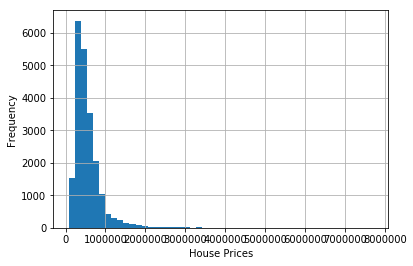

In [10]:
df['price'].hist(bins=50)
plt.xlabel("House Prices")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

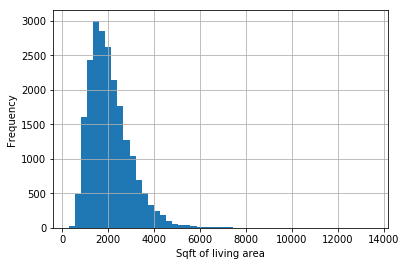

In [11]:
df['sqft_living'].hist(bins=50)
plt.xlabel("Sqft of living area")
plt.ylabel("Frequency")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10dc2400>,
      dtype=object)

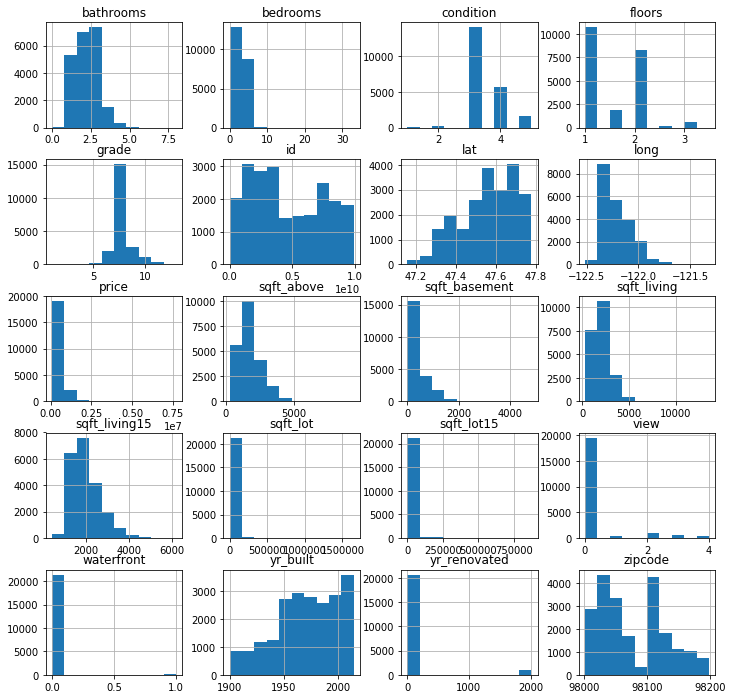

In [12]:
pd.DataFrame.hist(df,figsize=(12,12))

* ## Boxplot to check for Outliers:

{'boxes': [<matplotlib.lines.Line2D at 0x1a1227b7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1227bf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1228fc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1228f828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1227b978>,
  <matplotlib.lines.Line2D at 0x1a1227b048>]}

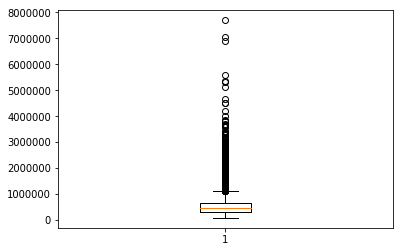

In [13]:
plt.boxplot(df['price'])

* ## Bivariate Analysis of Sqft living, Year built Vs Price.

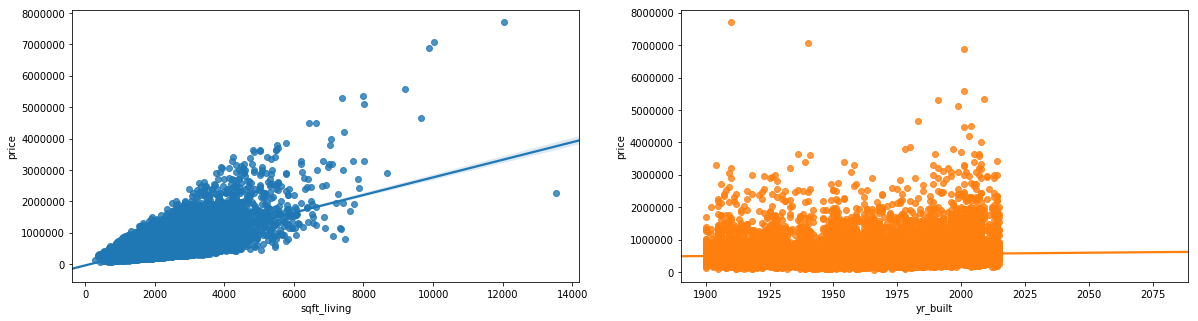

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.regplot(x="sqft_living", y="price", data=df,ax=ax1)
sns.regplot(x="yr_built", y="price", data=df,ax=ax2)

* ## Bivariate Analysis of Sqft above, Sqft below Vs Price.

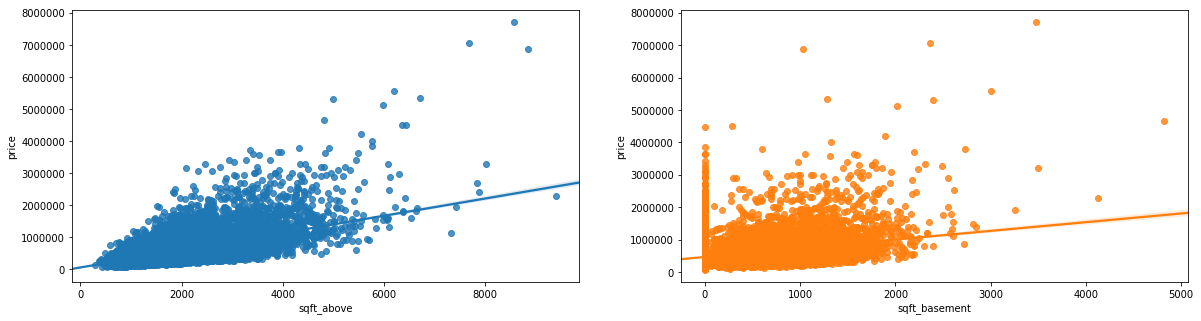

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.regplot(x="sqft_above", y="price", data=df,ax=ax1)
sns.regplot(x="sqft_basement", y="price", data=df,ax=ax2)

# Feature Engineering:

* ## Calculating age of house from Date variable

In [16]:
df['year_sold'] = df['date'].apply(lambda x: int(x[:4]))

In [17]:
df['age_house'] = df[['year_sold']].sub(df['yr_built'], axis=0)

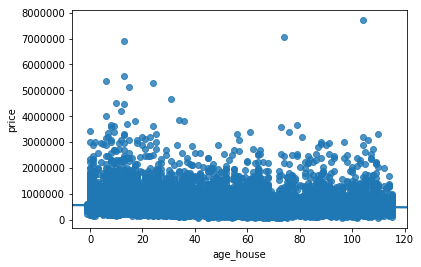

In [18]:
sns.regplot(x="age_house",y="price",data=df)

* ## Creating Is_renovated variable from year of renovation:

In [19]:
df['Is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

* ## Converting zipcodes into categories:

In [20]:
df = pd.get_dummies(df,columns=['zipcode'])

* ## Removing outliers from Price

In [21]:
df = df[df['price']<6000000]

# Dimension Reduction: 

In this step, we will remove all unnecessary variables which may not add any impact to our model. From the above exploration and visualization steps we have decided to remove these variables:

'id','date','sqft_lot','condition','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','year_sold','sqft_living15', 'sqft_lot15'

## Principal Component Analysis (PCA):

In [22]:
main_features = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'age_house',
       'Is_renovated']
# Separating out the features
X2 = df[df.columns.difference(main_features)].values
# Separating out the target
y2 = df.loc[:,['price']].values
# Standardizing the features
X2 = StandardScaler().fit_transform(X2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
pca = PCA(n_components=65)
pcomp = pca.fit(X2)

In [24]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [25]:
var1

array([ 1.47,  2.94,  4.41,  5.88,  7.35,  8.82, 10.28, 11.74, 13.2 ,
       14.66, 16.12, 17.58, 19.04, 20.5 , 21.96, 23.42, 24.88, 26.34,
       27.8 , 29.25, 30.7 , 32.15, 33.6 , 35.05, 36.5 , 37.95, 39.4 ,
       40.85, 42.3 , 43.75, 45.2 , 46.65, 48.1 , 49.55, 51.  , 52.45,
       53.9 , 55.35, 56.8 , 58.25, 59.7 , 61.15, 62.6 , 64.05, 65.5 ,
       66.95, 68.4 , 69.85, 71.29, 72.73, 74.17, 75.61, 77.05, 78.49,
       79.93, 81.37, 82.81, 84.25, 85.69, 87.13, 88.57, 90.01, 91.45,
       92.89, 94.33])

Text(0,0.5,'Variance achieved')

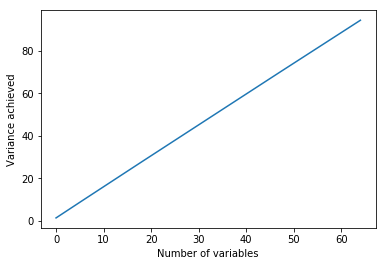

In [26]:
plt.plot(var1)
plt.xlabel('Number of variables')
plt.ylabel('Variance achieved')

In [97]:
#Looking at above plot I'm taking 40 variables
pca = PCA(n_components=40)
pca.fit(X2)
pca_var=pca.fit_transform(X)

In [99]:
principalDf = pd.DataFrame(data = pca_var)

In [112]:
df_pca.shape

(21613, 63)

In [114]:
df_pca = pd.concat([df[main_features], principalDf], axis = 1)
df_pca = df_pca.dropna(how='any')

In [116]:
X_pca = df_pca[df_pca.columns.difference(['price','id','date','sqft_lot','condition','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','year_sold','sqft_living15', 'sqft_lot15'])]
y_pca = df_pca['price']

In [77]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'age_house',
       'Is_renovated', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072

In [20]:
X = df[df.columns.difference(['price','id','date','sqft_lot','condition','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','year_sold','sqft_living15', 'sqft_lot15'])]
y = df['price']

# Building Models:

## Splitting the data into Train & Test:

In [133]:
X.columns

Index(['Is_renovated', 'age_house', 'bathrooms', 'bedrooms', 'floors', 'grade',
       'sqft_living', 'view', 'waterfront', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_9

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [117]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_pca, y_pca, test_size=0.20, random_state=0)

## Linear Regression:

In [121]:
def linear_model(X_train,y_train,X_test,y_test):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    ypred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,(ypred)))
    print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(y_test,ypred)
    print("R-squared value: "+ str(r_squared))
    sns.regplot(x=ypred,y=y_test)

Root mean squared error: 149318.4274974081
R-squared value: 0.814940073852652


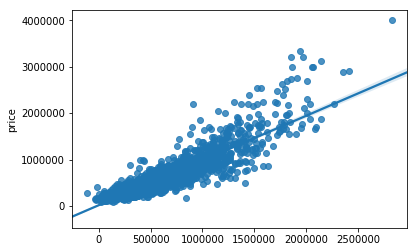

In [122]:
linear_model(X_train,y_train,X_test,y_test)

Root mean squared error: 208004.99153704423
R-squared value: 0.6620664999360444


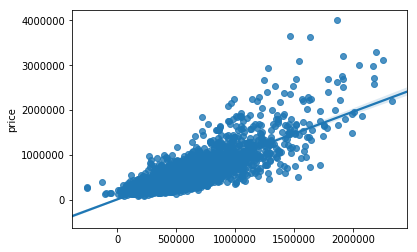

In [123]:
linear_model(X_trainP,y_trainP,X_testP,y_testP)

## Random forest:

In [126]:
def random_forest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor(max_depth=20)
    rf.fit(X_train,y_train)
    ypred2 = rf.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(ypred2,y_test))
    print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(y_test,ypred2)
    print("R-squared value: "+ str(r_squared))
    sns.regplot(x=ypred2,y=y_test)

Root mean squared error: 152115.5488747112
R-squared value: 0.8079418297920323


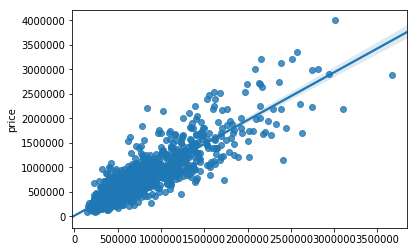

In [127]:
random_forest(X_train,y_train,X_test,y_test)

Root mean squared error: 200572.87925277802
R-squared value: 0.6857841051473164


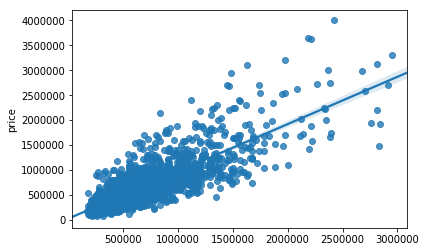

In [128]:
random_forest(X_trainP,y_trainP,X_testP,y_testP)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


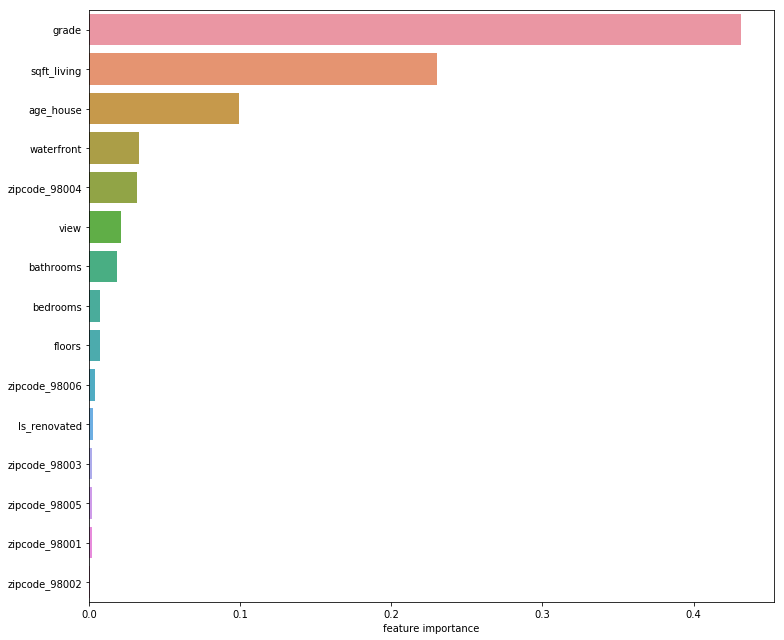

In [65]:
rf = RandomForestRegressor(max_depth=20)
rf.fit(X_train,y_train)
ranking = np.argsort(-rf.feature_importances_[:15])
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

# XG Boost:

In [124]:
def xg_boost(X_train,y_train,X_test,y_test):
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)
    ypred = xgb.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(y_test,ypred)
    print("R-squared value: "+ str(r_squared))
    sns.regplot(x=ypred,y=y_test)

Root mean squared error: 145747.57587919367
R-squared value: 0.8236854108119829


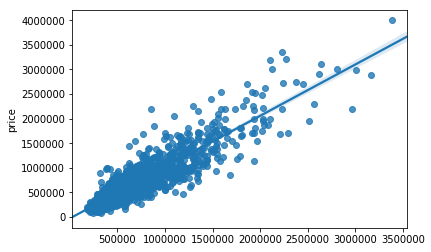

In [125]:
xg_boost(X_train,y_train,X_test,y_test)

Root mean squared error: 191851.02006385295
R-squared value: 0.7125171392411581


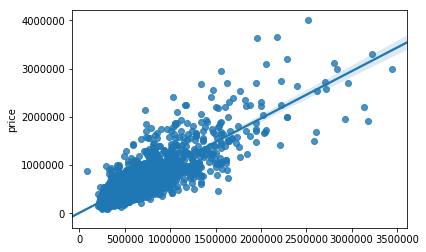

In [131]:
xg_boost(X_trainP,y_trainP,X_testP,y_testP)

## Gradient boosting technique:

In [129]:
def modelfit(alg, dtrain, ttrain, dtest, ttest, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, ttrain)
        
    #Predict training set:
    dtest_predictions = alg.predict(dtest)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, ttrain, cv=cv_folds)
    
    #Print model report:
    print("\nModel Report")
    print("Mean Squared Error : %.4g" % mean_squared_error(ttest.values, dtest_predictions))
    print("RMSE: %f" % np.sqrt(mean_squared_error(ttest.values, dtest_predictions)))
    
    r_squared = r2_score(ttest.values, dtest_predictions)
    print("R-squared value: "+ str(r_squared))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" 
              % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train.columns.values).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', figsize=(15,6))
        plt.ylabel('Feature Importance Score')


Model Report
Mean Squared Error : 1.682e+10
RMSE: 129708.042294
R-squared value: 0.8603569331521471
CV Score : Mean - 0.8566363 | Std - 0.009023994 | Min - 0.8451938 | Max - 0.8718148


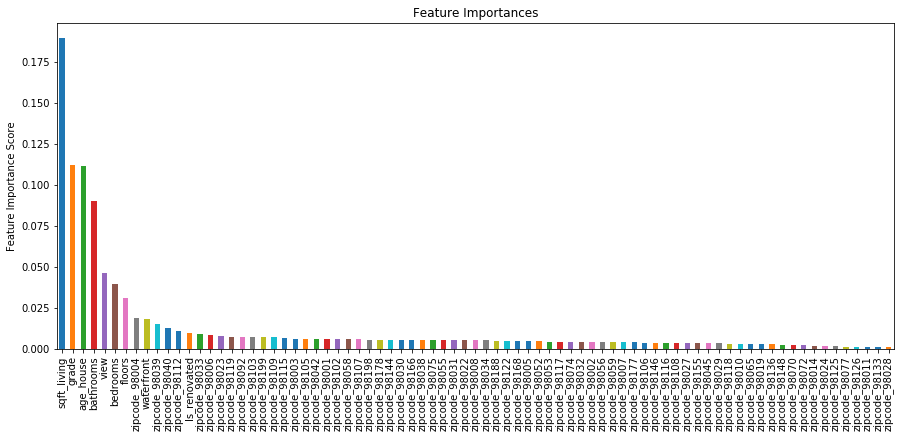

In [130]:
gbr = GradientBoostingRegressor(alpha= 0.9,learning_rate= 0.1,loss='ls',max_depth=15,n_estimators=100,min_samples_split=30,max_features=10,random_state=0)
modelfit(gbr, X_train, y_train, X_test, y_test)

Text(0,0.5,'Feature Importance Score')

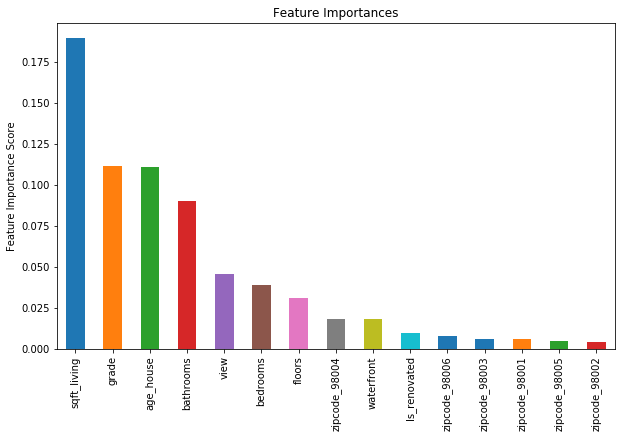

In [132]:
feat_imp = pd.Series(gbr.feature_importances_[:15], X_train.columns.values[:15]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(10,6))
plt.ylabel('Feature Importance Score')